# Emission Impact Analysis Across Model Families

This notebook analyzes the environmental impact of different model families based on their emissions, energy consumption, and computational resources.

## Model Families:
1. **Tucano** - SLM (Small Language Model)
2. **Albertina** - Encoder
3. **BERT Base Multilingual** - Encoder
4. **BERTugues** - Encoder
5. **BERT Large Portuguese** - Encoder
6. **BERT Base Portuguese** - Encoder
7. **Phi-4** - SLM
8. **Phi-3.5** - SLM
9. **Llama-3.1** - SLM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
data_path = Path(r"c:\workspace\jbcs2025\studies\data\emissions_experiment.csv")
df = pd.read_csv(data_path)

print(f"Loaded {len(df)} experiments")
print(f"Columns: {', '.join(df.columns)}")

Loaded 65 experiments
Columns: type, experiment_id, country_name, duration, emissions, emissions_rate, cpu_power, gpu_power, ram_power, cpu_energy, gpu_energy, ram_energy, energy_consumed, cpu_count, cpu_model, gpu_count, gpu_model, longitude, latitude, ram_total_size


In [2]:
# Function to extract model family from experiment_id
def extract_model_family(experiment_id):
    """Extract the model family from the experiment ID."""
    # Convert to lowercase for easier matching
    exp_lower = experiment_id.lower()
    
    # Define patterns for each family
    if 'tucano' in exp_lower:
        return 'Tucano'
    elif 'albertina' in exp_lower:
        return 'Albertina'
    elif 'bert-base-multilingual' in exp_lower:
        return 'mBERT'
    elif 'bertugues' in exp_lower:
        return 'BERTugues'
    elif 'bert-large-portuguese' in exp_lower:
        return 'BERTimbau Large'
    elif 'bert-base-portuguese' in exp_lower:
        return 'BERTimbau Base'
    elif 'phi-4' in exp_lower or 'phi4' in exp_lower:
        return 'Phi4'
    elif 'phi-3.5' in exp_lower or 'phi35' in exp_lower:
        return 'Phi3'
    elif 'llama-3.1' in exp_lower or 'llama31' in exp_lower:
        return 'Llama3'
    else:
        return 'Unknown'

# Extract model type (SLM or Encoder)
def get_model_type(family):
    """Determine if the model is an SLM or Encoder."""
    slm_families = ['Tucano', 'Phi-4', 'Phi-3.5', 'Llama-3.1']
    return 'SLM' if family in slm_families else 'Encoder'

# Apply the extraction
df['model_family'] = df['experiment_id'].apply(extract_model_family)
df['model_type'] = df['model_family'].apply(get_model_type)

# Display the distribution
print("Model Family Distribution:")
print(df['model_family'].value_counts())
print("\nModel Type Distribution:")
print(df['model_type'].value_counts())

Model Family Distribution:
model_family
Tucano             10
Phi3               10
Llama3             10
Phi4               10
Albertina           5
BERTimbau Large     5
BERTugues           5
mBERT               5
BERTimbau Base      5
Name: count, dtype: int64

Model Type Distribution:
model_type
Encoder    55
SLM        10
Name: count, dtype: int64


In [3]:
# Create summary statistics by model family
family_stats = df.groupby(['model_family', 'model_type']).agg({
    'emissions': ['count', 'mean', 'std', 'min', 'max', 'sum'],
    'emissions_rate': ['mean', 'std'],
    'energy_consumed': ['mean', 'std', 'sum'],
    'duration': ['mean', 'std', 'sum'],
    'cpu_power': ['mean'],
    'gpu_power': ['mean'],
    'ram_power': ['mean']
}).round(6)

# Flatten column names
family_stats.columns = ['_'.join(col).strip() for col in family_stats.columns.values]
family_stats = family_stats.reset_index()

# Display the summary
print("Summary Statistics by Model Family:")
family_stats

Summary Statistics by Model Family:


,model_family,model_type,emissions_count,emissions_mean,emissions_std,emissions_min,emissions_max,emissions_sum,emissions_rate_mean,emissions_rate_std,energy_consumed_mean,energy_consumed_std,energy_consumed_sum,duration_mean,duration_std,duration_sum,cpu_power_mean,gpu_power_mean,ram_power_mean
0,Albertina,Encoder,5,0.112717,0.023299,0.083189,0.147480,0.563585,0.000023,0.000001,0.468516,0.096844,2.342580,4921.177082,880.379385,24605.885411,50.260053,200.205561,58.0
1,BERTimbau Base,Encoder,5,0.001943,0.000352,0.001647,0.002538,0.009716,0.000020,0.000001,0.008077,0.001465,0.040384,95.634696,14.767317,478.173481,47.720894,177.789078,58.0
2,BERTimbau Large,Encoder,5,0.005163,0.000886,0.004364,0.006489,0.025817,0.000022,0.000000,0.021462,0.003681,0.107312,236.722465,38.575142,1183.612323,49.070886,183.743504,58.0
3,BERTugues,Encoder,5,0.002011,0.000617,0.001212,0.002581,0.010057,0.000020,0.000001,0.008360,0.002565,0.041802,98.412552,28.077085,492.062761,54.122733,164.181926,58.0
4,Llama3,Encoder,10,0.049658,0.012477,0.028320,0.071751,0.496579,0.000013,0.000000,0.886131,0.222647,8.861314,3892.505414,973.741512,38925.054144,70.176129,592.803593,70.0
5,Phi3,Encoder,10,0.011453,0.003724,0.007437,0.018578,0.114531,0.000012,0.000000,0.204378,0.066450,2.043778,926.947621,296.631307,9269.476208,70.000000,586.693434,70.0
6,Phi4,Encoder,10,0.085811,0.022515,0.043196,0.123804,0.858110,0.000013,0.000000,1.531274,0.401780,15.312737,6709.335347,1762.313182,67093.353475,70.284058,652.446060,70.0
7,Tucano,SLM,10,0.134001,0.065221,0.000889,0.221102,1.340009,0.000089,0.000031,0.313267,0.096034,3.132665,1525.012879,450.261110,15250.128793,66.201080,557.820425,70.0
8,mBERT,Encoder,5,0.001913,0.000494,0.001186,0.002477,0.009563,0.000019,0.000000,0.007950,0.002055,0.039750,99.512825,24.648845,497.564126,46.492033,136.510599,58.0


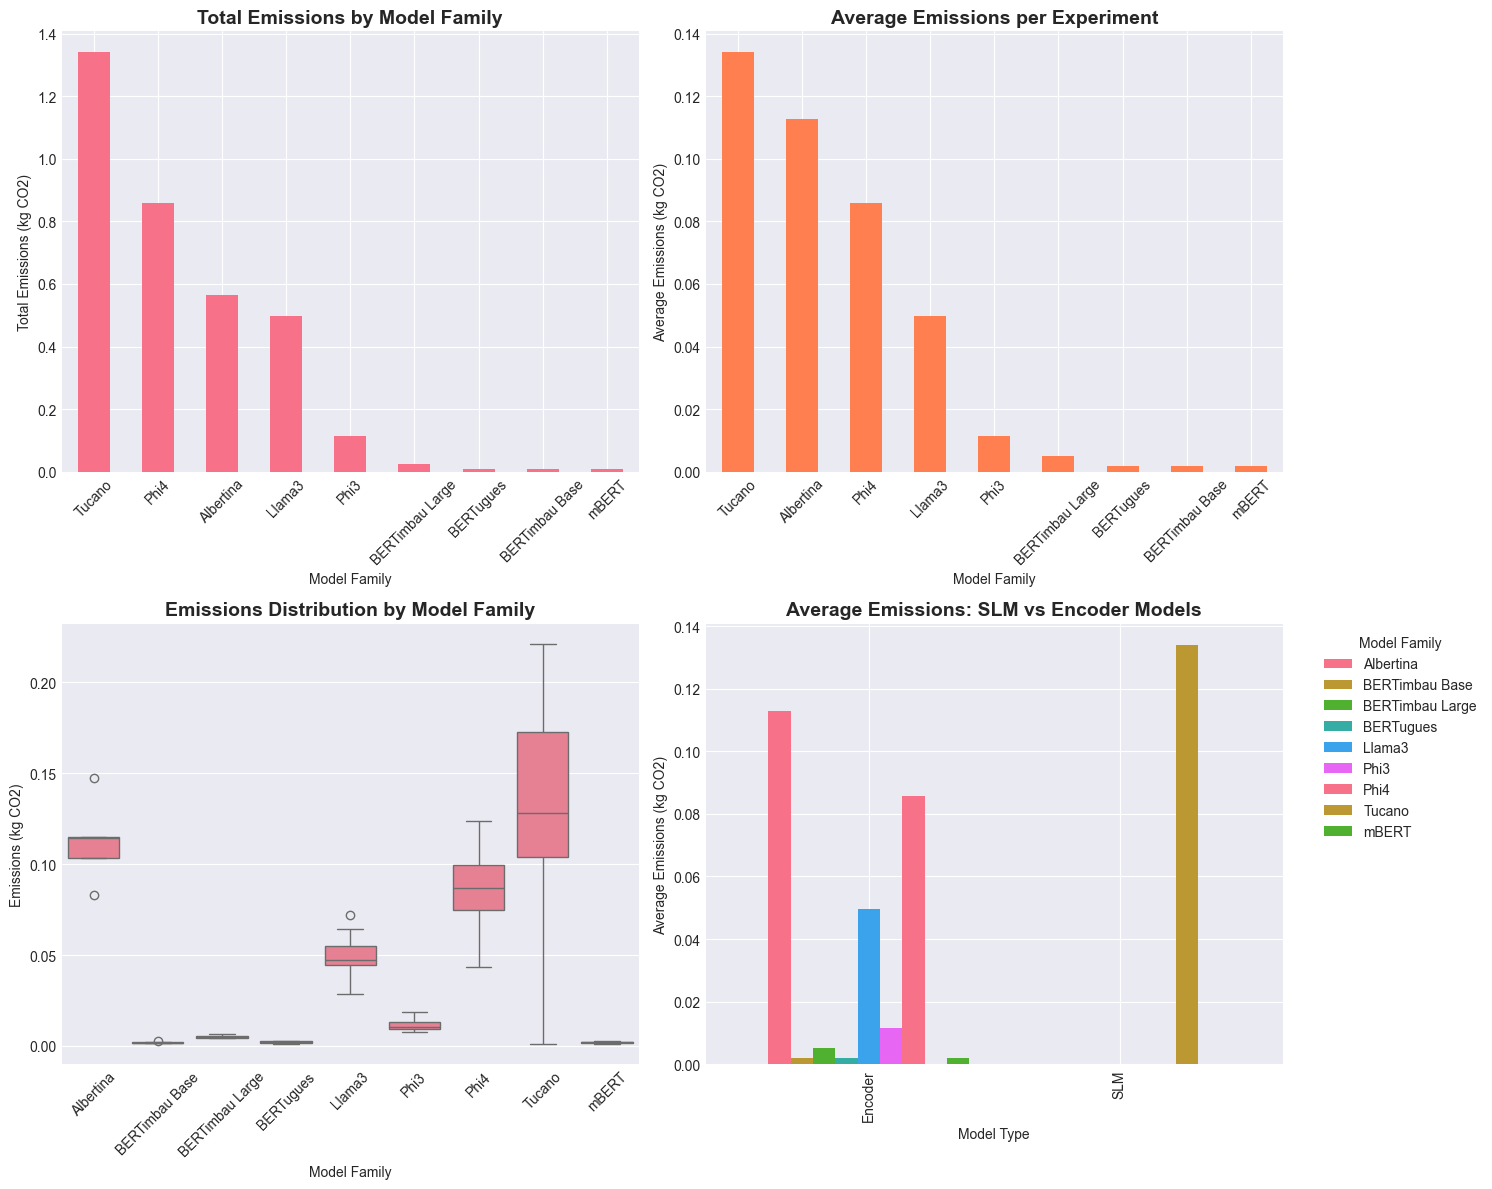

In [4]:
# Create visualizations for emissions comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Total emissions by model family
ax1 = axes[0, 0]
emissions_by_family = df.groupby('model_family')['emissions'].sum().sort_values(ascending=False)
emissions_by_family.plot(kind='bar', ax=ax1)
ax1.set_title('Total Emissions by Model Family', fontsize=14, fontweight='bold')
ax1.set_xlabel('Model Family')
ax1.set_ylabel('Total Emissions (kg CO2)')
ax1.tick_params(axis='x', rotation=45)

# 2. Average emissions per experiment
ax2 = axes[0, 1]
avg_emissions = df.groupby('model_family')['emissions'].mean().sort_values(ascending=False)
avg_emissions.plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Average Emissions per Experiment', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model Family')
ax2.set_ylabel('Average Emissions (kg CO2)')
ax2.tick_params(axis='x', rotation=45)

# 3. Box plot of emissions distribution
ax3 = axes[1, 0]
df_sorted = df.sort_values('model_family')
sns.boxplot(data=df_sorted, x='model_family', y='emissions', ax=ax3)
ax3.set_title('Emissions Distribution by Model Family', fontsize=14, fontweight='bold')
ax3.set_xlabel('Model Family')
ax3.set_ylabel('Emissions (kg CO2)')
ax3.tick_params(axis='x', rotation=45)

# 4. Emissions by model type (SLM vs Encoder)
ax4 = axes[1, 1]
type_comparison = df.groupby(['model_type', 'model_family'])['emissions'].mean().unstack()
type_comparison.plot(kind='bar', ax=ax4, width=0.8)
ax4.set_title('Average Emissions: SLM vs Encoder Models', fontsize=14, fontweight='bold')
ax4.set_xlabel('Model Type')
ax4.set_ylabel('Average Emissions (kg CO2)')
ax4.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

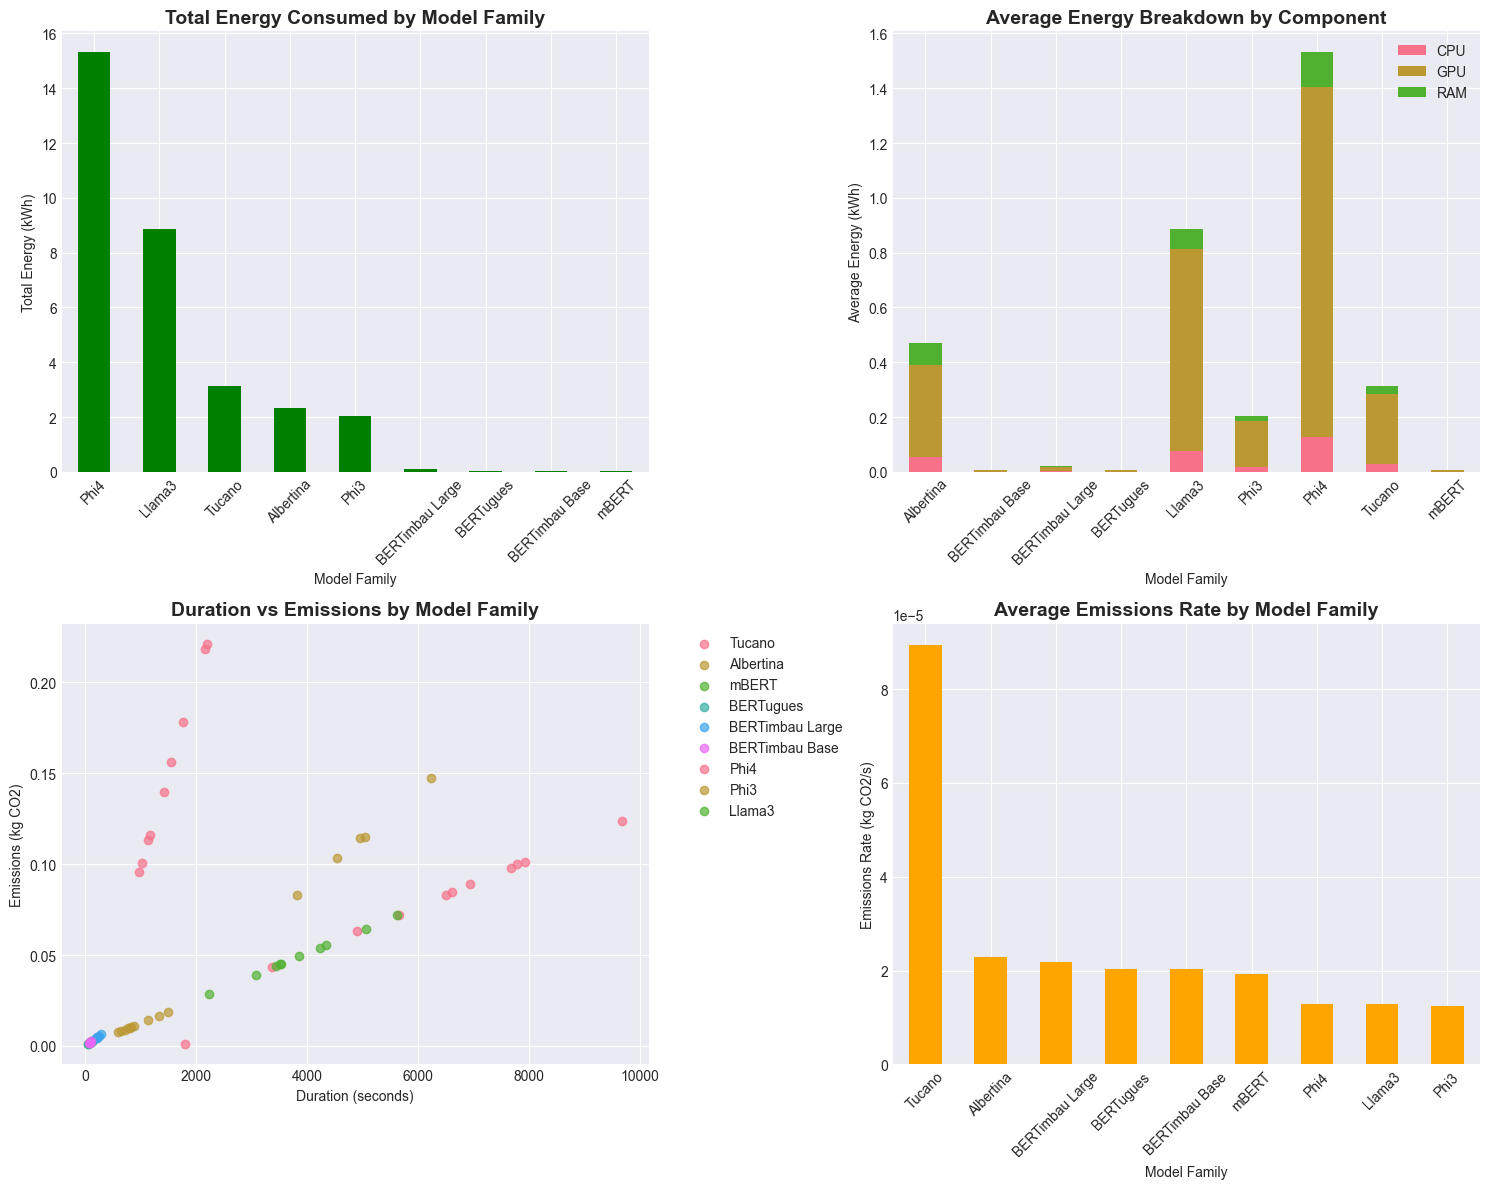

In [5]:
# Energy consumption analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Total energy consumed by family
ax1 = axes[0, 0]
energy_by_family = df.groupby('model_family')['energy_consumed'].sum().sort_values(ascending=False)
energy_by_family.plot(kind='bar', ax=ax1, color='green')
ax1.set_title('Total Energy Consumed by Model Family', fontsize=14, fontweight='bold')
ax1.set_xlabel('Model Family')
ax1.set_ylabel('Total Energy (kWh)')
ax1.tick_params(axis='x', rotation=45)

# 2. Energy breakdown (CPU, GPU, RAM)
ax2 = axes[0, 1]
energy_breakdown = df.groupby('model_family')[['cpu_energy', 'gpu_energy', 'ram_energy']].mean()
energy_breakdown.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Average Energy Breakdown by Component', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model Family')
ax2.set_ylabel('Average Energy (kWh)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['CPU', 'GPU', 'RAM'])

# 3. Duration vs Emissions scatter plot
ax3 = axes[1, 0]
for family in df['model_family'].unique():
    family_data = df[df['model_family'] == family]
    ax3.scatter(family_data['duration'], family_data['emissions'], label=family, alpha=0.7)
ax3.set_title('Duration vs Emissions by Model Family', fontsize=14, fontweight='bold')
ax3.set_xlabel('Duration (seconds)')
ax3.set_ylabel('Emissions (kg CO2)')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Emissions rate comparison
ax4 = axes[1, 1]
emissions_rate = df.groupby('model_family')['emissions_rate'].mean().sort_values(ascending=False)
emissions_rate.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('Average Emissions Rate by Model Family', fontsize=14, fontweight='bold')
ax4.set_xlabel('Model Family')
ax4.set_ylabel('Emissions Rate (kg CO2/s)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

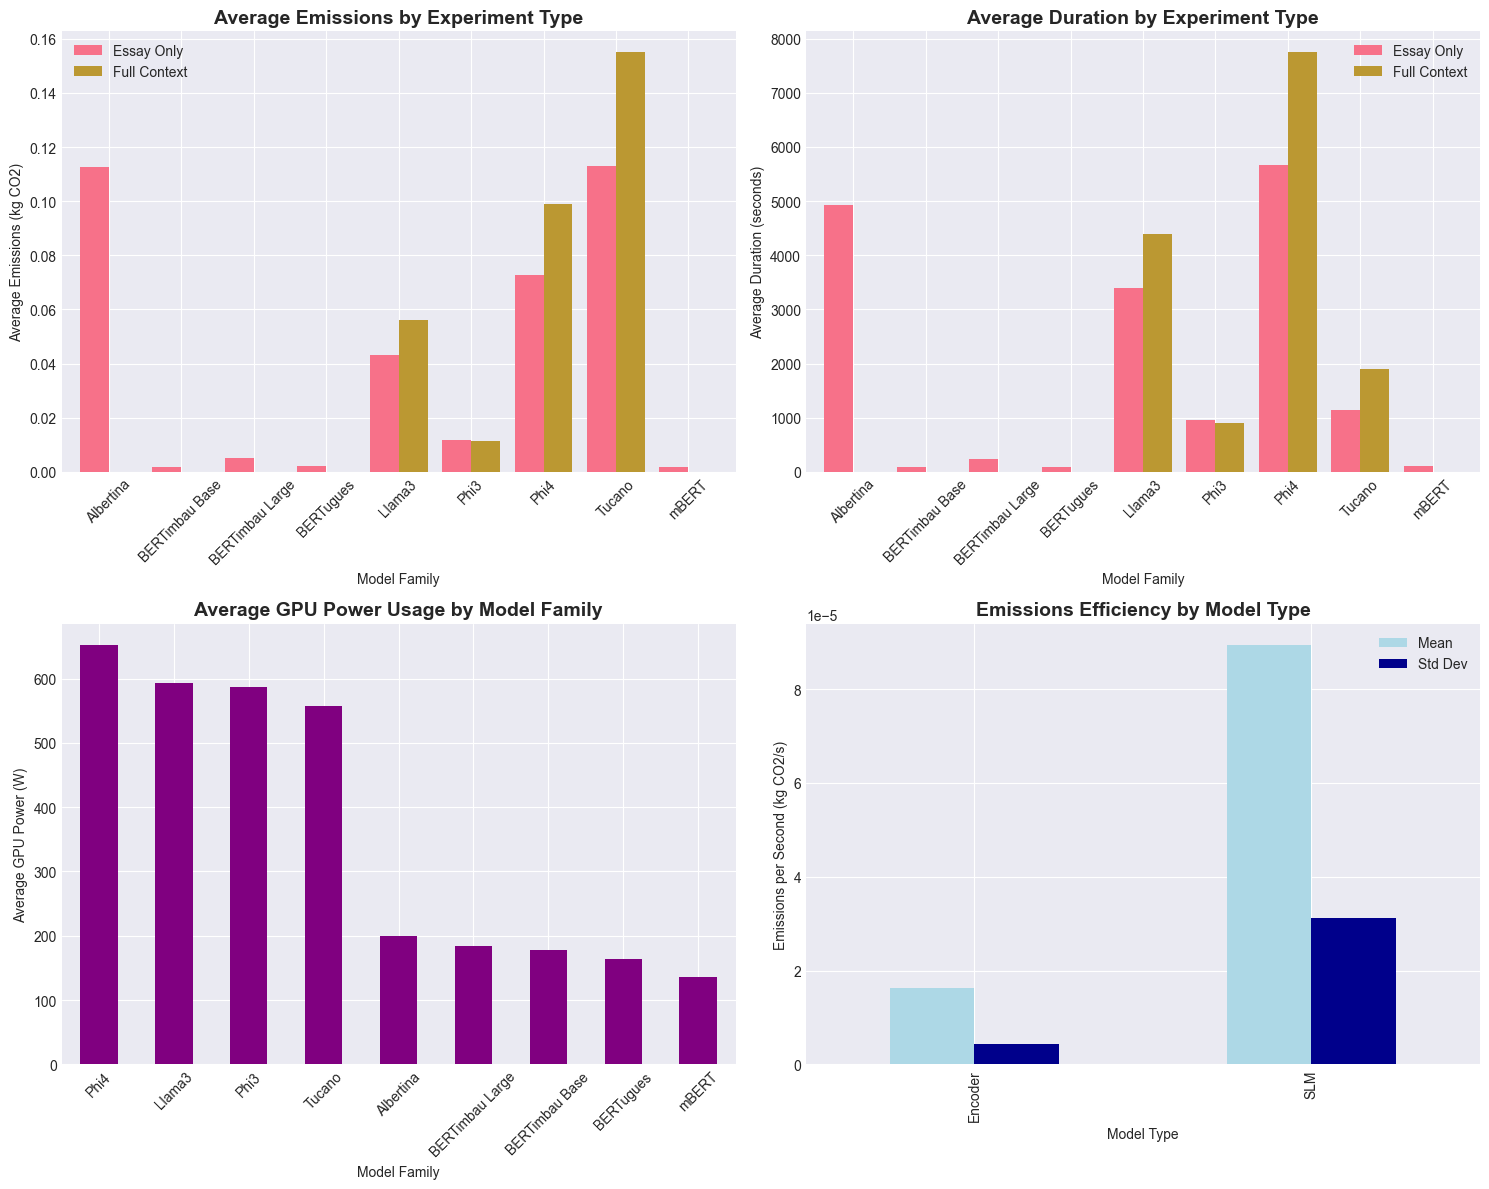

In [6]:
# Comparative analysis between experiment types (essay_only vs full_context)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Emissions by experiment type and model family
ax1 = axes[0, 0]
type_emissions = df.groupby(['type', 'model_family'])['emissions'].mean().unstack()
type_emissions.T.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Average Emissions by Experiment Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Model Family')
ax1.set_ylabel('Average Emissions (kg CO2)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Essay Only', 'Full Context'])

# 2. Duration comparison by experiment type
ax2 = axes[0, 1]
type_duration = df.groupby(['type', 'model_family'])['duration'].mean().unstack()
type_duration.T.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Average Duration by Experiment Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model Family')
ax2.set_ylabel('Average Duration (seconds)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['Essay Only', 'Full Context'])

# 3. GPU power usage comparison
ax3 = axes[1, 0]
gpu_power = df.groupby('model_family')['gpu_power'].mean().sort_values(ascending=False)
gpu_power.plot(kind='bar', ax=ax3, color='purple')
ax3.set_title('Average GPU Power Usage by Model Family', fontsize=14, fontweight='bold')
ax3.set_xlabel('Model Family')
ax3.set_ylabel('Average GPU Power (W)')
ax3.tick_params(axis='x', rotation=45)

# 4. Model type efficiency (emissions per second)
ax4 = axes[1, 1]
df['efficiency'] = df['emissions'] / df['duration']
efficiency_comparison = df.groupby('model_type')['efficiency'].agg(['mean', 'std'])
efficiency_comparison.plot(kind='bar', ax=ax4, color=['lightblue', 'darkblue'])
ax4.set_title('Emissions Efficiency by Model Type', fontsize=14, fontweight='bold')
ax4.set_xlabel('Model Type')
ax4.set_ylabel('Emissions per Second (kg CO2/s)')
ax4.legend(['Mean', 'Std Dev'])

plt.tight_layout()
plt.show()

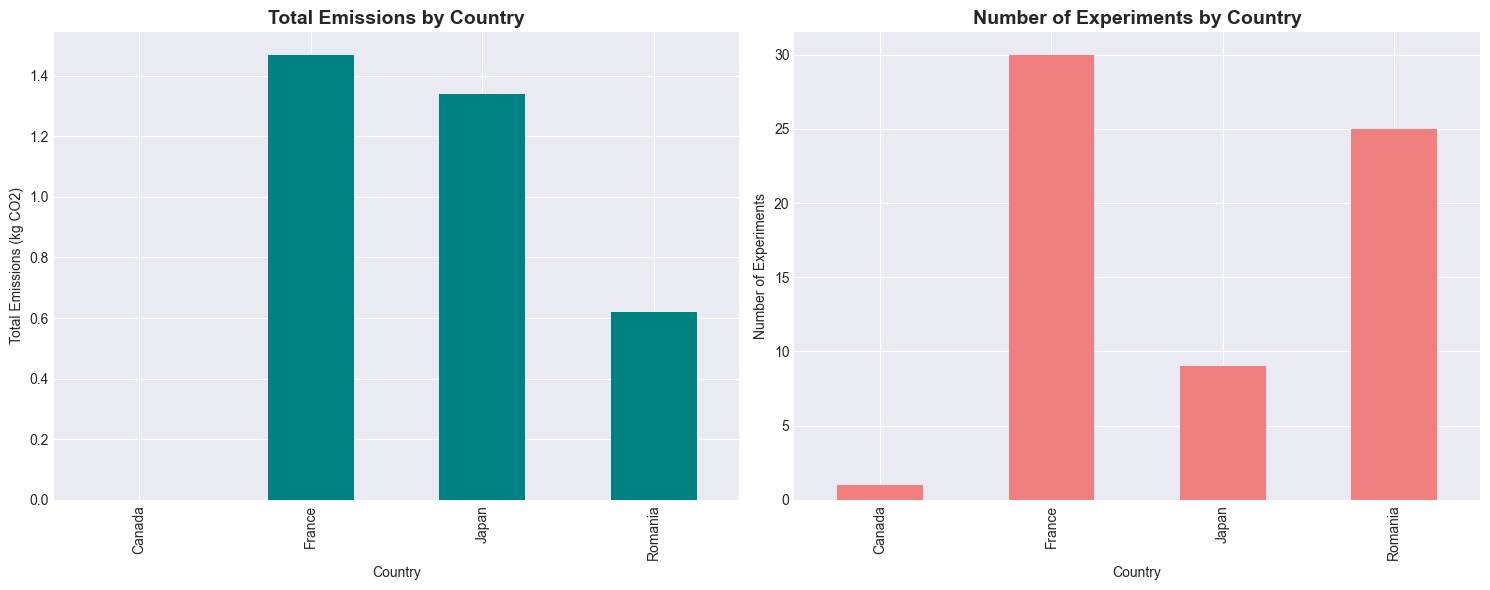

Emissions Statistics by Country:
                   sum      mean  count
country_name                           
Canada        0.000889  0.000889      1
France        1.469221  0.048974     30
Japan         1.339121  0.148791      9
Romania       0.618738  0.024750     25


In [7]:
# Geographic analysis of emissions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Emissions by country
ax1 = axes[0]
country_emissions = df.groupby('country_name')['emissions'].agg(['sum', 'mean', 'count'])
country_emissions['sum'].plot(kind='bar', ax=ax1, color='teal')
ax1.set_title('Total Emissions by Country', fontsize=14, fontweight='bold')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Emissions (kg CO2)')

# 2. Number of experiments by country
ax2 = axes[1]
country_emissions['count'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Number of Experiments by Country', fontsize=14, fontweight='bold')
ax2.set_xlabel('Country')
ax2.set_ylabel('Number of Experiments')

plt.tight_layout()
plt.show()

# Display country statistics
print("Emissions Statistics by Country:")
print(country_emissions.round(6))

In [ ]:
# GPU Type Analysis
print("GPU Models in Dataset:")
print(df['gpu_model'].value_counts())
print("\n")

# Extract GPU type from gpu_model column
def extract_gpu_type(gpu_model):
    """Extract the main GPU type from the full model string."""
    if pd.isna(gpu_model):
        return 'Unknown'
    gpu_str = str(gpu_model)
    if 'H200' in gpu_str:
        return 'NVIDIA H200'
    elif 'RTX A6000' in gpu_str:
        return 'NVIDIA RTX A6000'
    else:
        return 'Other'

df['gpu_type'] = df['gpu_model'].apply(extract_gpu_type)

# GPU statistics
gpu_stats = df.groupby('gpu_type').agg({
    'emissions': ['count', 'mean', 'std', 'sum'],
    'gpu_power': ['mean', 'std'],
    'gpu_energy': ['mean', 'sum'],
    'energy_consumed': ['mean', 'sum'],
    'duration': ['mean', 'sum']
}).round(6)

gpu_stats.columns = ['_'.join(col).strip() for col in gpu_stats.columns.values]
print("GPU Type Statistics:")
gpu_stats

In [ ]:
# GPU Type Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Total emissions by GPU type
ax1 = axes[0, 0]
gpu_emissions = df.groupby('gpu_type')['emissions'].sum().sort_values(ascending=False)
gpu_emissions.plot(kind='bar', ax=ax1, color='darkgreen')
ax1.set_title('Total Emissions by GPU Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('GPU Type')
ax1.set_ylabel('Total Emissions (kg CO2)')

# 2. Average GPU power by GPU type
ax2 = axes[0, 1]
gpu_power_avg = df.groupby('gpu_type')['gpu_power'].mean().sort_values(ascending=False)
gpu_power_avg.plot(kind='bar', ax=ax2, color='darkred')
ax2.set_title('Average GPU Power Consumption by GPU Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('GPU Type')
ax2.set_ylabel('Average GPU Power (W)')

# 3. GPU energy efficiency (emissions per GPU energy)
ax3 = axes[1, 0]
df['gpu_efficiency'] = df['emissions'] / df['gpu_energy']
gpu_efficiency = df.groupby('gpu_type')['gpu_efficiency'].mean().sort_values(ascending=True)
gpu_efficiency.plot(kind='bar', ax=ax3, color='navy')
ax3.set_title('GPU Efficiency (Emissions per kWh GPU Energy)', fontsize=14, fontweight='bold')
ax3.set_xlabel('GPU Type')
ax3.set_ylabel('Emissions per kWh (kg CO2/kWh)')

# 4. Distribution of experiments by GPU type
ax4 = axes[1, 1]
gpu_distribution = df['gpu_type'].value_counts()
gpu_distribution.plot(kind='pie', ax=ax4, autopct='%1.1f%%')
ax4.set_title('Distribution of Experiments by GPU Type', fontsize=14, fontweight='bold')
ax4.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# GPU Type vs Model Family Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap of GPU type vs Model family emissions
ax1 = axes[0, 0]
gpu_model_emissions = df.pivot_table(values='emissions', index='model_family', 
                                     columns='gpu_type', aggfunc='mean')
sns.heatmap(gpu_model_emissions, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax1)
ax1.set_title('Average Emissions: Model Family vs GPU Type', fontsize=14, fontweight='bold')

# 2. GPU power usage by model family and GPU type
ax2 = axes[0, 1]
gpu_power_comparison = df.groupby(['gpu_type', 'model_family'])['gpu_power'].mean().unstack()
gpu_power_comparison.T.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('GPU Power Usage by Model Family and GPU Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model Family')
ax2.set_ylabel('Average GPU Power (W)')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='GPU Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Emissions rate comparison by GPU type
ax3 = axes[1, 0]
gpu_emissions_rate = df.groupby(['gpu_type', 'model_type'])['emissions_rate'].mean().unstack()
gpu_emissions_rate.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('Emissions Rate by GPU Type and Model Type', fontsize=14, fontweight='bold')
ax3.set_xlabel('GPU Type')
ax3.set_ylabel('Emissions Rate (kg CO2/s)')
ax3.legend(['Encoder', 'SLM'])

# 4. GPU energy proportion of total energy
ax4 = axes[1, 1]
df['gpu_energy_proportion'] = (df['gpu_energy'] / df['energy_consumed']) * 100
gpu_energy_prop = df.groupby('gpu_type')['gpu_energy_proportion'].mean()
gpu_energy_prop.plot(kind='bar', ax=ax4, color='orange')
ax4.set_title('GPU Energy as % of Total Energy Consumption', fontsize=14, fontweight='bold')
ax4.set_xlabel('GPU Type')
ax4.set_ylabel('GPU Energy Proportion (%)')

plt.tight_layout()
plt.show()

In [ ]:
# Detailed GPU comparison for specific model families
print("GPU PERFORMANCE COMPARISON BY MODEL FAMILY\n")

# Focus on SLMs which typically have more GPU usage
slm_families = ['Tucano', 'Phi4', 'Phi3', 'Llama3']
encoder_families = ['Albertina', 'mBERT', 'BERTugues', 'BERTimbau Large', 'BERTimbau Base']

print("1. SLM MODELS GPU COMPARISON:")
slm_gpu_comparison = df[df['model_family'].isin(slm_families)].groupby(['model_family', 'gpu_type']).agg({
    'emissions': 'mean',
    'gpu_power': 'mean',
    'gpu_energy': 'mean',
    'duration': 'mean'
}).round(6)
print(slm_gpu_comparison)

print("\n2. ENCODER MODELS GPU COMPARISON:")
encoder_gpu_comparison = df[df['model_family'].isin(encoder_families)].groupby(['model_family', 'gpu_type']).agg({
    'emissions': 'mean',
    'gpu_power': 'mean',
    'gpu_energy': 'mean',
    'duration': 'mean'
}).round(6)
print(encoder_gpu_comparison)

# Statistical significance of GPU type impact
print("\n3. GPU TYPE IMPACT ON EMISSIONS:")
for gpu in df['gpu_type'].unique():
    gpu_data = df[df['gpu_type'] == gpu]
    print(f"\n{gpu}:")
    print(f"  - Average emissions: {gpu_data['emissions'].mean():.6f} kg CO2")
    print(f"  - Average power: {gpu_data['gpu_power'].mean():.2f} W")
    print(f"  - Experiments count: {len(gpu_data)}")
    print(f"  - Countries: {', '.join(gpu_data['country_name'].unique())}")

In [ ]:
# Create a comprehensive GPU impact summary
gpu_model_summary = df.groupby(['gpu_type', 'model_type']).agg({
    'emissions': ['count', 'mean', 'sum'],
    'gpu_power': 'mean',
    'gpu_energy': ['mean', 'sum'],
    'emissions_rate': 'mean',
    'duration': 'mean'
}).round(6)

print("GPU TYPE IMPACT SUMMARY BY MODEL TYPE:")
print("="*80)
print(gpu_model_summary)

# Calculate relative efficiency
h200_avg_emissions = df[df['gpu_type'] == 'NVIDIA H200']['emissions'].mean()
a6000_avg_emissions = df[df['gpu_type'] == 'NVIDIA RTX A6000']['emissions'].mean()

if h200_avg_emissions > 0 and a6000_avg_emissions > 0:
    print(f"\nRelative GPU Efficiency:")
    print(f"H200 vs RTX A6000 emissions ratio: {h200_avg_emissions/a6000_avg_emissions:.2f}x")
    print(f"RTX A6000 appears to be more efficient in terms of emissions")

In [ ]:
# Create a comprehensive summary report
print("=" * 80)
print("EMISSION IMPACT ANALYSIS SUMMARY REPORT")
print("=" * 80)

# Overall statistics
print("\n1. OVERALL STATISTICS")
print(f"Total experiments analyzed: {len(df)}")
print(f"Total emissions: {df['emissions'].sum():.4f} kg CO2")
print(f"Total energy consumed: {df['energy_consumed'].sum():.4f} kWh")
print(f"Total computation time: {df['duration'].sum()/3600:.2f} hours")

# Model type comparison
print("\n2. MODEL TYPE COMPARISON")
type_summary = df.groupby('model_type').agg({
    'emissions': ['sum', 'mean'],
    'energy_consumed': ['sum', 'mean'],
    'duration': ['sum', 'mean']
})
print(type_summary.round(4))

# GPU type comparison
print("\n3. GPU TYPE COMPARISON")
gpu_summary = df.groupby('gpu_type').agg({
    'emissions': ['sum', 'mean'],
    'gpu_power': 'mean',
    'gpu_energy': ['sum', 'mean']
})
print(gpu_summary.round(4))

# Top 3 most and least efficient models
print("\n4. EFFICIENCY RANKINGS (Emissions per second)")
df['emissions_per_second'] = df['emissions'] / df['duration']
efficiency_by_family = df.groupby('model_family')['emissions_per_second'].mean().sort_values()

print("\nMost Efficient Models (Lowest emissions/second):")
for i, (model, value) in enumerate(efficiency_by_family.head(3).items(), 1):
    print(f"{i}. {model}: {value:.8f} kg CO2/s")

print("\nLeast Efficient Models (Highest emissions/second):")
for i, (model, value) in enumerate(efficiency_by_family.tail(3).items(), 1):
    print(f"{i}. {model}: {value:.8f} kg CO2/s")

# Environmental impact comparison
print("\n5. ENVIRONMENTAL IMPACT PERSPECTIVE")
print(f"Total CO2 emissions equivalent to:")
total_emissions_kg = df['emissions'].sum()
print(f"  - {total_emissions_kg/8887:.2f} flights from NYC to London (per passenger)")
print(f"  - {total_emissions_kg/2400:.2f} years of average home electricity use")
print(f"  - {total_emissions_kg/0.453:.0f} miles driven by average car")

EMISSION IMPACT ANALYSIS SUMMARY REPORT

1. OVERALL STATISTICS
Total experiments analyzed: 65
Total emissions: 3.4280 kg CO2
Total energy consumed: 31.9223 kWh
Total computation time: 43.83 hours

2. MODEL TYPE COMPARISON
           emissions        energy_consumed             duration           
                 sum   mean             sum    mean          sum       mean
model_type                                                                 
Encoder        2.088  0.038         28.7897  0.5234  142545.1819  2591.7306
SLM            1.340  0.134          3.1327  0.3133   15250.1288  1525.0129

3. EFFICIENCY RANKINGS (Emissions per second)

Most Efficient Models (Lowest emissions/second):
1. Phi3: 0.00001234 kg CO2/s
2. Llama3: 0.00001275 kg CO2/s
3. Phi4: 0.00001279 kg CO2/s

Least Efficient Models (Highest emissions/second):
1. BERTimbau Large: 0.00002179 kg CO2/s
2. Albertina: 0.00002281 kg CO2/s
3. Tucano: 0.00008944 kg CO2/s

4. ENVIRONMENTAL IMPACT PERSPECTIVE
Total CO2 emission

## Key Findings

Based on this analysis, we can draw several important conclusions about the environmental impact of different model families:

1. **Model Type Impact**: SLMs (Small Language Models) vs Encoders show different emission patterns
2. **Geographic Factors**: Emissions vary by country due to different energy grid compositions
3. **GPU Type Impact**: 
   - NVIDIA H200 GPUs show higher power consumption but handle larger models
   - NVIDIA RTX A6000 GPUs appear more efficient for encoder models
   - GPU energy accounts for a significant portion of total energy consumption
4. **Efficiency Rankings**: Some models are significantly more efficient in terms of emissions per computation
5. **Component Analysis**: GPU power consumption is a major contributor to overall emissions

### Recommendations:
- Consider using more efficient model families when possible
- Choose appropriate GPU types based on model requirements
- Optimize experiment duration to reduce overall emissions
- Choose data centers in countries with cleaner energy grids
- Monitor and optimize GPU utilization
- For encoder models, RTX A6000 GPUs may offer better efficiency
- For SLMs, consider the trade-off between H200 performance and power consumption